In [1]:
import plotly.io as pio
pio.renderers.default = "png"

import sys
sys.path.append('../../')

from aztec_gddt.analysis.execute import execute_sim, complexity_desc
from aztec_gddt.analysis.visualizations import plot_agg_kpis, plot_inspect_vars
from aztec_gddt.analysis.metrics import *
from aztec_gddt.scenario_experiments import *

In [2]:
from aztec_gddt.helper_types import ExperimentParamSpec

exp_spec = ExperimentParamSpec(
    params_swept_control={
        'VALIDATOR_COMMITTEE_SIZE': [128, 512],
        'SIGNATURES_NEEDED': [0.0, 1.0]
    },
    params_swept_env={
        'MAX_VALIDATORS_TO_SLASH': [0.0, 1.0],
        'SIGNATURE_SKIP_PROBABILITY': [0.00, 1.0]

    },
    N_timesteps=1_000,
    N_samples=1,
    N_config_sample=-1,
    relevant_per_trajectory_metrics=PER_TRAJECTORY_METRICS_LABELS.keys(),
    relevant_per_trajectory_group_metrics=PER_TRAJECTORY_GROUP_METRICS_LABELS.keys(),
)

In [3]:
CONTROL_PARAMS = list(exp_spec.params_swept_control.keys())

sim_df, exec_time = execute_sim(exp_spec.prepare())


                  ___________    ____
  ________ __ ___/ / ____/   |  / __ \
 / ___/ __` / __  / /   / /| | / / / /
/ /__/ /_/ / /_/ / /___/ ___ |/ /_/ /
\___/\__,_/\__,_/\____/_/  |_/_____/
by cadCAD

cadCAD Version: 0.5.3
Execution Mode: single_proc
Simulation Dimensions:
Entire Simulation: (Models, Unique Timesteps, Params, Total Runs, Sub-States) = (1, 1000, 51, 16, 34)
     Simulation 0: (Timesteps, Params, Runs, Sub-States) = (1000, 51, 16, 34)


Initializing configurations:   0%|          | 0/16 [00:00<?, ?it/s]

Execution Method: single_proc_exec


Flattening results:   0%|          | 0/112016 [00:00<?, ?it/s]

Total execution time: 6.15s


In [4]:
print(complexity_desc(sim_df, exec_time))


    #### Computational Complexity:
    1. Total number of parameter combinations: 16
    2. Total number of Monte Carlo runs per parameter combination: 16
    3. Total number of trajectories: 16
    4. Total number of timesteps per trajectory: 1,000
    5. Total number of state measurements: 16,016
    6. Workflow execution time: 11.1 seconds (0.693 seconds per trajectory)
    7. Engine execution time: 6.15 seconds (0.385 seconds per trajectory)
    


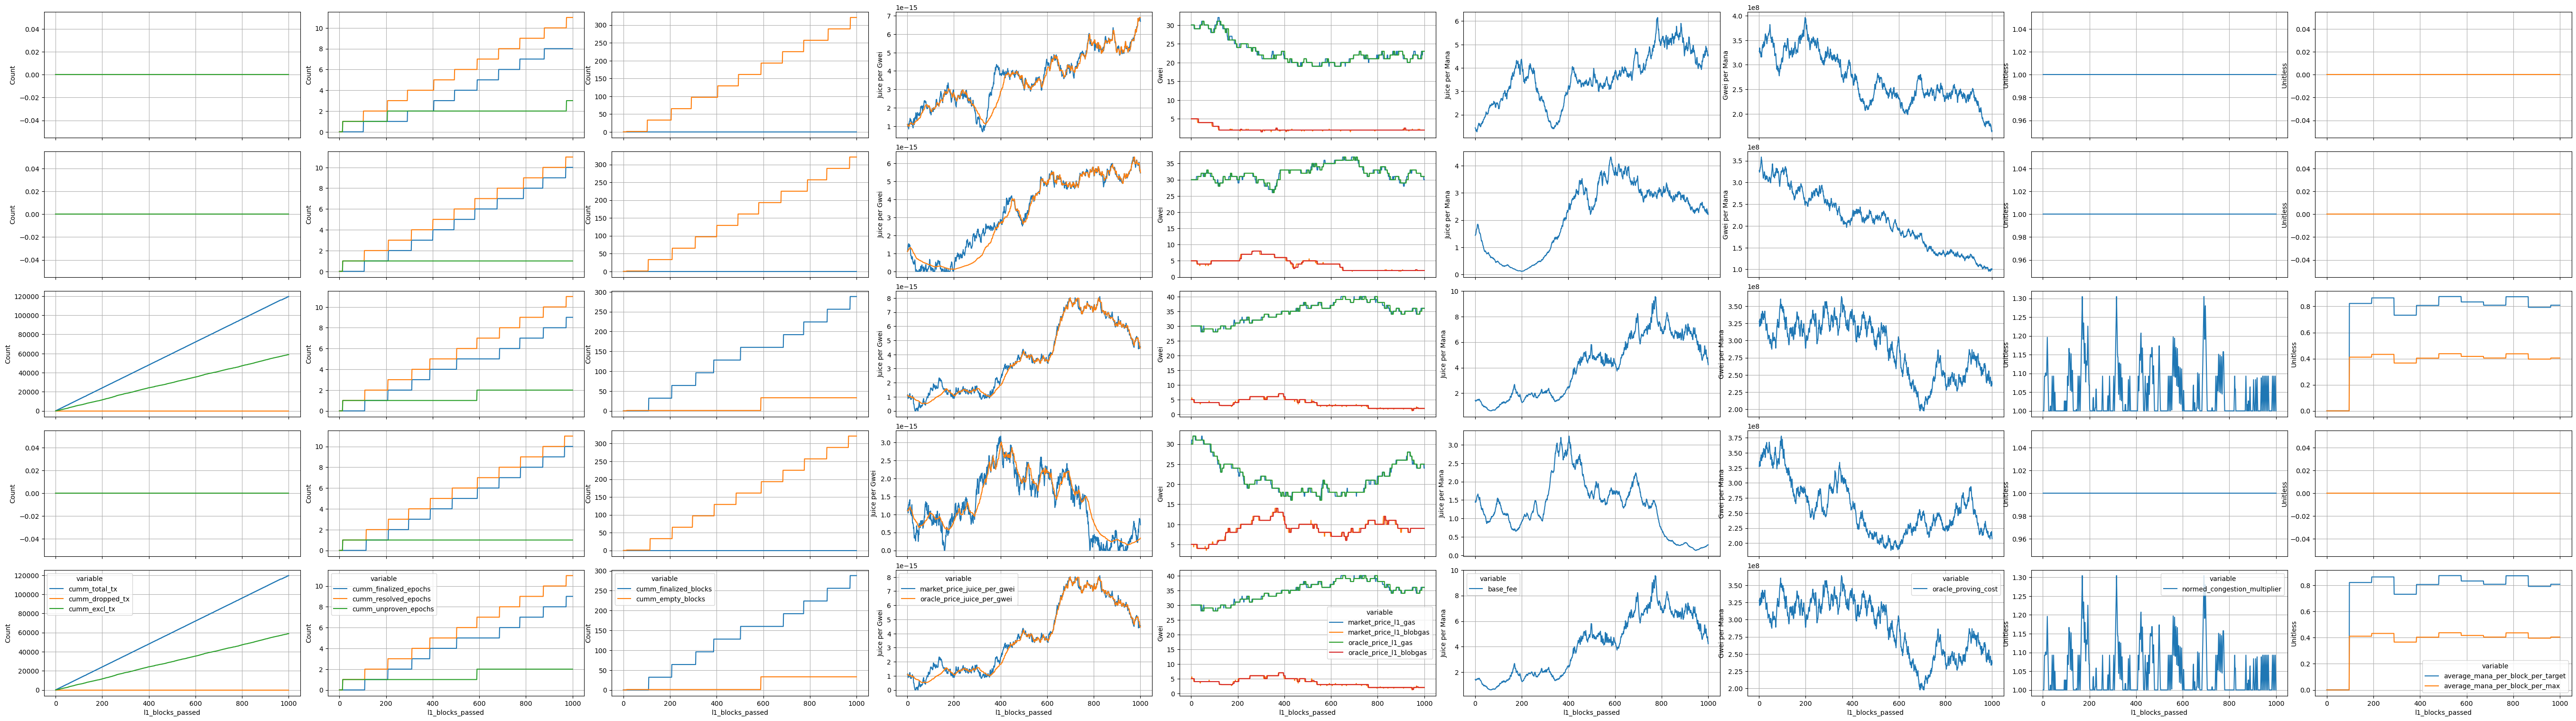

In [7]:
plot_inspect_vars(sim_df)

In [5]:
agg_df, c_agg_df = retrieve_feature_df(sim_df, CONTROL_PARAMS, exp_spec.relevant_per_trajectory_group_metrics)

/Users/danlessa/repos/bsci/aztec-gddt-v2/notebooks/dev/../../aztec_gddt/analysis/metrics.py:19: RuntimeWarning:

invalid value encountered in scalar divide

/Users/danlessa/repos/bsci/aztec-gddt-v2/notebooks/dev/../../aztec_gddt/analysis/metrics.py:19: RuntimeWarning:

invalid value encountered in scalar divide

/Users/danlessa/repos/bsci/aztec-gddt-v2/notebooks/dev/../../aztec_gddt/analysis/metrics.py:23: RuntimeWarning:

invalid value encountered in scalar divide

/Users/danlessa/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:49: RuntimeWarning:

invalid value encountered in reduce

/Users/danlessa/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:49: RuntimeWarning:

invalid value encountered in reduce



In [6]:
agg_df

metric,simulation,subset,VALIDATOR_COMMITTEE_SIZE,SIGNATURES_NEEDED,TG-M1,TG-M10,TG-M12,TG-M13,TG-M2,TG-M3,TG-M4,TG-M5,TG-M6,TG-M7,TG-M8a,TG-M8b,TG-M9
0,0,0,128,0.0,8.561220e-16,1.0,1.0,1.0,6.0,1.0,0.0,1.0,0.496679,1.0,NaN,NaN,inf
1,0,1,128,0.0,1.101534e-15,1.0,1.0,1.0,36.0,2.0,0.0,1.0,0.490066,1.0,NaN,NaN,inf
2,0,2,128,0.0,4.883031e-16,0.0,0.0,0.0,321.0,1.0,NaN,0.0,NaN,0.0,NaN,NaN,inf
3,0,3,128,0.0,9.912696e-16,0.0,0.0,0.0,321.0,1.0,NaN,0.0,NaN,1.0,NaN,NaN,inf
4,0,4,128,1.0,3.216002e-15,0.0,0.0,0.0,321.0,2.0,NaN,0.0,NaN,0.0,NaN,NaN,inf
5,0,5,128,1.0,1.184466e-15,0.0,0.0,0.0,321.0,3.0,NaN,0.0,NaN,1.0,NaN,NaN,inf
6,0,6,128,1.0,8.133942e-16,0.0,0.0,0.0,321.0,2.0,NaN,0.0,NaN,1.0,NaN,NaN,inf
7,0,7,128,1.0,1.462463e-15,0.0,0.0,0.0,321.0,1.0,NaN,0.0,NaN,1.0,NaN,NaN,inf
8,0,8,512,0.0,1.040321e-15,1.0,1.0,1.0,33.0,2.0,0.0,1.0,0.492026,0.0,NaN,NaN,inf
9,0,9,512,0.0,2.257553e-15,1.0,1.0,1.0,37.0,2.0,0.0,1.0,0.503462,1.0,NaN,NaN,inf
